# 获取无RTC文件的干管流量

干管节点：WS02006249、WS02006234、WS02006228

In [2]:
import pyswmm
import numpy as np
import pandas as pd
from swmm_api import read_out_file
from swmm_api import output_file
import matplotlib.pyplot as plt

e:\anaconda3\envs\tensorflow-cpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 获取HC控制泵站流量，观察控制频次（怀疑PPO在雨小时不如HC的原因是控制频率）

In [102]:
out = read_out_file('./Step3_1_S1-S8/S7/Results/chaohu_GI_rain_3.out')
print(out.number_columns)

2054


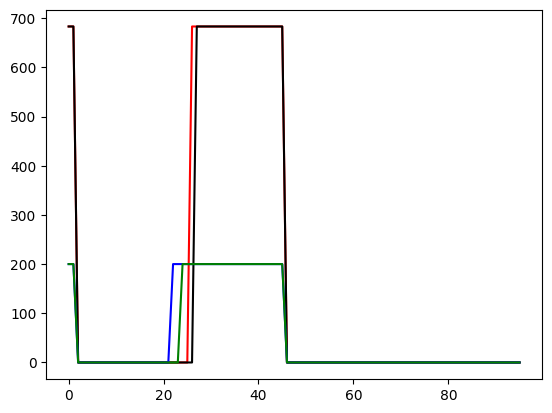

In [103]:
plt.plot(out.get_part('link','CC-R1','flow').values[0:480:5],'r')
plt.plot(out.get_part('link','CC-R2','flow').values[0:480:5],'k')
plt.plot(out.get_part('link','CC-S1','flow').values[0:480:5],'b')
plt.plot(out.get_part('link','CC-S2','flow').values[0:480:5],'g')


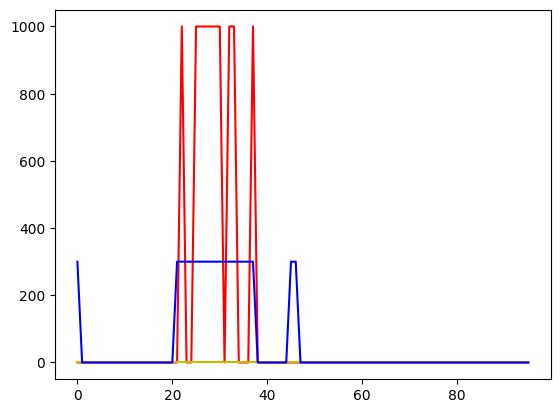

In [104]:
plt.plot(out.get_part('link','JK-R1','flow').values[0:480:5],'r')
plt.plot(out.get_part('link','JK-R2','flow').values[0:480:5],'y')
plt.plot(out.get_part('link','JK-S','flow').values[0:480:5],'b')

# 对比DRL的控制频次

In [3]:
data = np.load('./Step4_RTC/PPO/Results/RSH/3.npy',allow_pickle=True).tolist()
at=pd.read_csv('./Step4_RTC/PPO/action_table.csv').values[:,1:]
tem=[]
for i in data['action']:
    tem.append(at[i.numpy()[0]].tolist())
tem=np.array(tem)

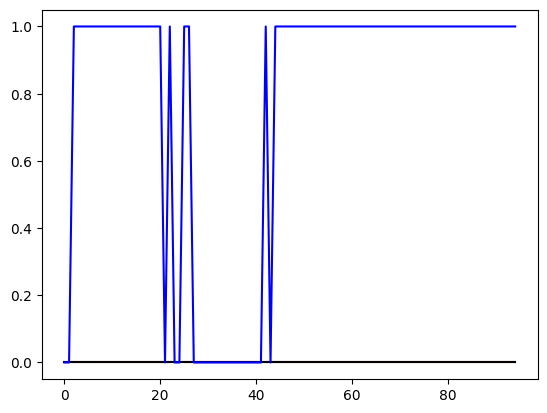

In [5]:
plt.plot(tem[:,0],'r')
plt.plot(tem[:,1],'k')
plt.plot(tem[:,2],'b')

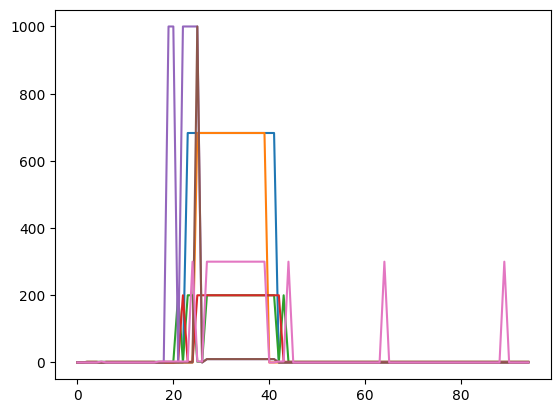

In [11]:
for i in range(7):
    plt.plot(np.array(data['pump_flow'])[:,i])

RSH干管流量结果
S1, S4, S7, S10

In [5]:
def flow_fig_RSH(rainid):   
    
    # original S1
    out = read_out_file('./Step3_1_S1-S12/S1/Results/chaohu_rain_'+rainid+'.out')
    print(out.number_columns)
    # GI  S4
    out1 = read_out_file('./Step3_1_S1-S12/S4/Results/chaohu_GI_rain_'+rainid+'.out')
    print(out1.number_columns)
    # RTC(HC) S7
    out2 = read_out_file('./Step3_1_S1-S12/S7/Results/chaohu_rain_'+rainid+'.out')
    print(out2.number_columns)
    # GI+RTC(HC) S10
    out3 = read_out_file('./Step3_1_S1-S12/S10/Results/chaohu_GI_rain_'+rainid+'.out')
    print(out3.number_columns)

    data1=out.get_part('link','WS02006251WS02006249','Flow_rate')
    data2=out.get_part('link','WS02006235WS02006234','Flow_rate')
    data3=out.get_part('link','WS02006229WS02006228','Flow_rate')

    data11=out1.get_part('link','WS02006251WS02006249','Flow_rate')
    data12=out1.get_part('link','WS02006235WS02006234','Flow_rate')
    data13=out1.get_part('link','WS02006229WS02006228','Flow_rate')
    
    data21=out2.get_part('link','WS02006251WS02006249','Flow_rate')
    data22=out2.get_part('link','WS02006235WS02006234','Flow_rate')
    data23=out2.get_part('link','WS02006229WS02006228','Flow_rate')
    
    data31=out3.get_part('link','WS02006251WS02006249','Flow_rate')
    data32=out3.get_part('link','WS02006235WS02006234','Flow_rate')
    data33=out3.get_part('link','WS02006229WS02006228','Flow_rate')

    #rtcdata=np.load('./Step4_RTC/PPO/Results/RSH/'+rainid+'.npy',allow_pickle=True).tolist()
    #da=np.array(rtcdata['mainpip'])

    fig,ax = plt.subplots(3,1,figsize=(10,10),dpi=100)

    ax[0].plot(data1.values[0:480:5],label='original')
    ax[0].plot(data11.values[0:480:5],label='GI')
    ax[0].plot(data21.values[0:480:5],label='RTC(HC)')
    ax[0].plot(data31.values[0:480:5],label='RTC(HC)+GI')
    ax[0].legend()

    ax[1].plot(data2.values[0:480:5],label='original')
    ax[1].plot(data12.values[0:480:5],label='GI')
    ax[1].plot(data22.values[0:480:5],label='RTC(HC)')
    ax[1].plot(data32.values[0:480:5],label='RTC(HC)+GI')
    ax[1].legend()
    
    ax[2].plot(data3.values[0:480:5],label='original')
    ax[2].plot(data13.values[0:480:5],label='GI')
    ax[2].plot(data23.values[0:480:5],label='RTC(HC)')
    ax[2].plot(data33.values[0:480:5],label='RTC(HC)+GI')
    ax[2].legend()

2054
2054
2054
2054


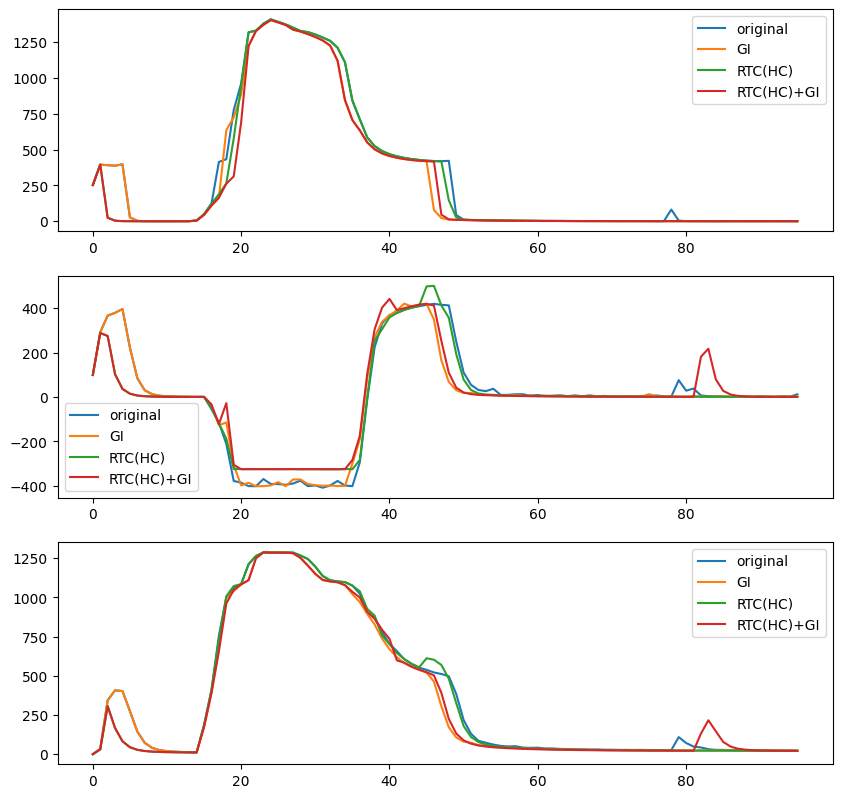

In [6]:
flow_fig_RSH('3')

RN干管流量结果 
S2, S5, S8, S11

In [23]:
def flow_fig_RN(rainid):   
    
    # original S1
    out = read_out_file('./Step3_1_S1-S12/S2/Results/chaohu_rain_'+rainid+'.out')
    print(out.number_columns)
    # GI  
    out1 = read_out_file('./Step3_1_S1-S12/S5/Results/chaohu_GI_rain_'+rainid+'.out')
    print(out1.number_columns)
    # RTC(HC) 
    out2 = read_out_file('./Step3_1_S1-S12/S8/Results/chaohu_rain_'+rainid+'.out')
    print(out2.number_columns)
    # GI+RTC(HC)
    out3 = read_out_file('./Step3_1_S1-S12/S11/Results/chaohu_GI_rain_'+rainid+'.out')
    print(out3.number_columns)

    data1=out.get_part('link','WS02006251WS02006249','Flow_rate')
    data2=out.get_part('link','WS02006235WS02006234','Flow_rate')
    data3=out.get_part('link','WS02006229WS02006228','Flow_rate')

    data11=out1.get_part('link','WS02006251WS02006249','Flow_rate')
    data12=out1.get_part('link','WS02006235WS02006234','Flow_rate')
    data13=out1.get_part('link','WS02006229WS02006228','Flow_rate')
    
    data21=out2.get_part('link','WS02006251WS02006249','Flow_rate')
    data22=out2.get_part('link','WS02006235WS02006234','Flow_rate')
    data23=out2.get_part('link','WS02006229WS02006228','Flow_rate')
    
    data31=out3.get_part('link','WS02006251WS02006249','Flow_rate')
    data32=out3.get_part('link','WS02006235WS02006234','Flow_rate')
    data33=out3.get_part('link','WS02006229WS02006228','Flow_rate')

    #rtcdata=np.load('./Step4_RTC/PPO/Results/RSH/'+rainid+'.npy',allow_pickle=True).tolist()
    #da=np.array(rtcdata['mainpip'])

    fig,ax = plt.subplots(3,1,figsize=(10,10),dpi=100)

    ax[0].plot(data1.values[0:480:5],label='original')
    ax[0].plot(data11.values[0:480:5],label='GI')
    ax[0].plot(data21.values[0:480:5],label='RTC(HC)')
    ax[0].plot(data31.values[0:480:5],label='RTC(HC)+GI')
    ax[0].legend()

    ax[1].plot(data2.values[0:480:5],label='original')
    ax[1].plot(data12.values[0:480:5],label='GI')
    ax[1].plot(data22.values[0:480:5],label='RTC(HC)')
    ax[1].plot(data32.values[0:480:5],label='RTC(HC)+GI')
    ax[1].legend()
    
    ax[2].plot(data3.values[0:480:5],label='original')
    ax[2].plot(data13.values[0:480:5],label='GI')
    ax[2].plot(data23.values[0:480:5],label='RTC(HC)')
    ax[2].plot(data33.values[0:480:5],label='RTC(HC)+GI')
    ax[2].legend()

2054
2054
2054
2054


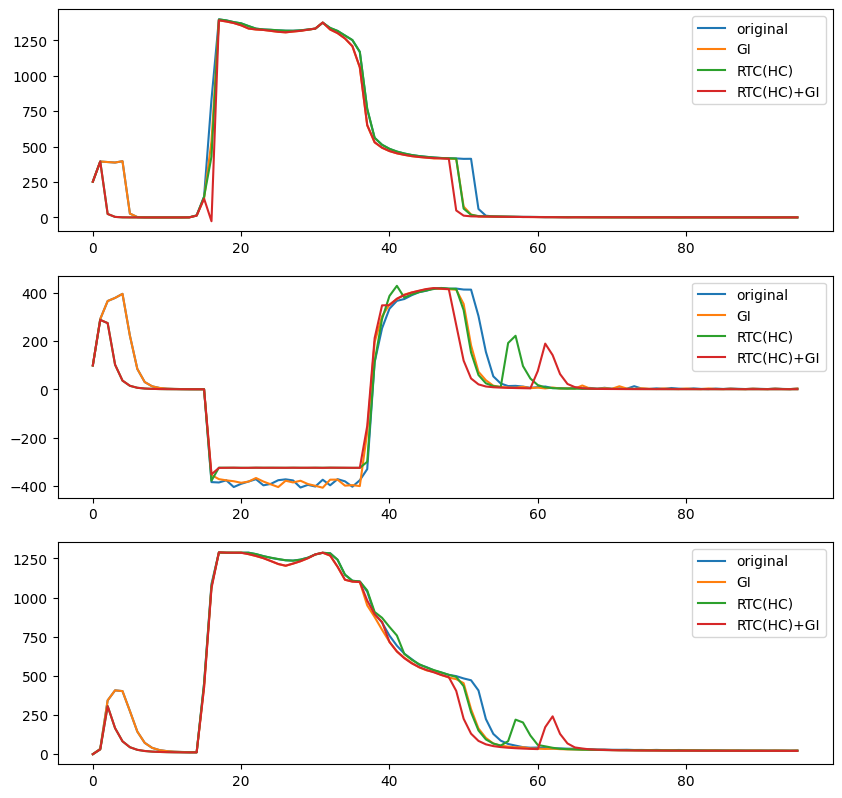

In [24]:
flow_fig_RN('1')

RR干管流量结果 S3, S6, S9, S12

In [27]:
def flow_fig_RR(rainid):   
    
    # original S1
    out = read_out_file('./Step3_1_S1-S12/S3/Results/chaohu_rain_'+rainid+'.out')
    print(out.number_columns)
    # GI  
    out1 = read_out_file('./Step3_1_S1-S12/S6/Results/chaohu_GI_noRTC_rain_'+rainid+'.out')
    print(out1.number_columns)
    # RTC(HC) 
    out2 = read_out_file('./Step3_1_S1-S12/S9/Results/chaohu_rain_'+rainid+'.out')
    print(out2.number_columns)
    # GI+RTC(HC)
    out3 = read_out_file('./Step3_1_S1-S12/S12/Results/chaohu_GI_rain_'+rainid+'.out')
    print(out3.number_columns)

    data1=out.get_part('link','WS02006251WS02006249','Flow_rate')
    data2=out.get_part('link','WS02006235WS02006234','Flow_rate')
    data3=out.get_part('link','WS02006229WS02006228','Flow_rate')

    data11=out1.get_part('link','WS02006251WS02006249','Flow_rate')
    data12=out1.get_part('link','WS02006235WS02006234','Flow_rate')
    data13=out1.get_part('link','WS02006229WS02006228','Flow_rate')
    
    data21=out2.get_part('link','WS02006251WS02006249','Flow_rate')
    data22=out2.get_part('link','WS02006235WS02006234','Flow_rate')
    data23=out2.get_part('link','WS02006229WS02006228','Flow_rate')
    
    data31=out3.get_part('link','WS02006251WS02006249','Flow_rate')
    data32=out3.get_part('link','WS02006235WS02006234','Flow_rate')
    data33=out3.get_part('link','WS02006229WS02006228','Flow_rate')

    #rtcdata=np.load('./Step4_RTC/PPO/Results/RSH/'+rainid+'.npy',allow_pickle=True).tolist()
    #da=np.array(rtcdata['mainpip'])

    fig,ax = plt.subplots(3,1,figsize=(10,10),dpi=100)

    ax[0].plot(data1.values[0:480:5],label='original')
    ax[0].plot(data11.values[0:480:5],label='GI')
    ax[0].plot(data21.values[0:480:5],label='RTC(HC)')
    ax[0].plot(data31.values[0:480:5],label='RTC(HC)+GI')
    ax[0].legend()

    ax[1].plot(data2.values[0:480:5],label='original')
    ax[1].plot(data12.values[0:480:5],label='GI')
    ax[1].plot(data22.values[0:480:5],label='RTC(HC)')
    ax[1].plot(data32.values[0:480:5],label='RTC(HC)+GI')
    ax[1].legend()
    
    ax[2].plot(data3.values[0:480:5],label='original')
    ax[2].plot(data13.values[0:480:5],label='GI')
    ax[2].plot(data23.values[0:480:5],label='RTC(HC)')
    ax[2].plot(data33.values[0:480:5],label='RTC(HC)+GI')
    ax[2].legend()

2054
2054
2054
2054


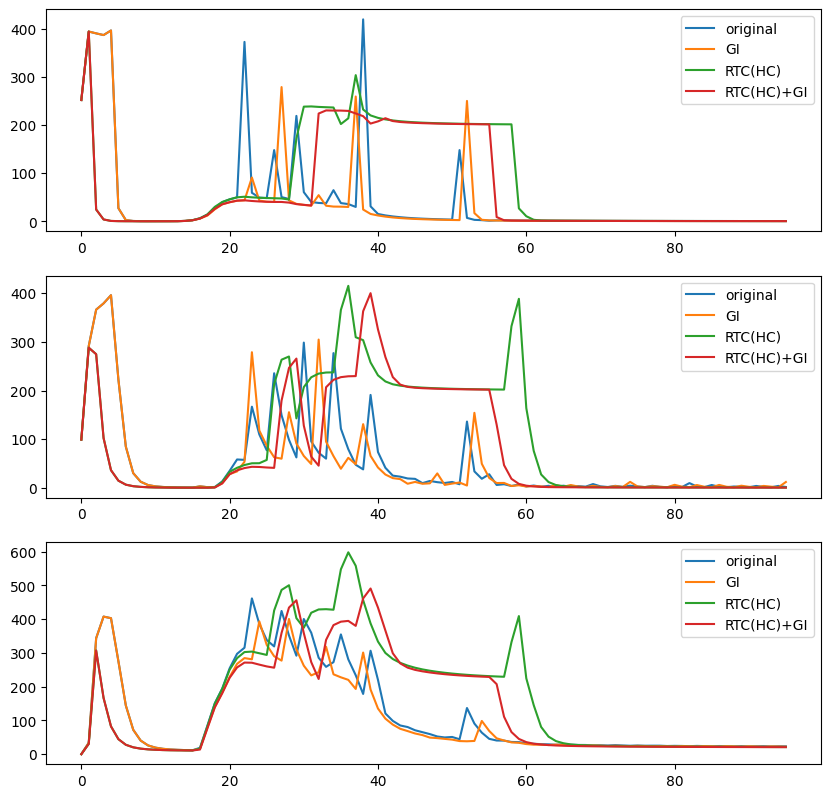

In [28]:
flow_fig_RR('3')